## CS 180: Artificial Intelligence<br>Machine Problem 2

#  An Artificial Neural Network for the Poker Hand Classification Problem
------
## By Don Abril and Micah Tan

# Introduction
------
<p> Poker is (arguably) one of the most popular family of card games, and is one that involves gambling. In general, Poker is a luck-based game whose players rely on the strengths of the best combinations that arise from cards in play, dealt from a standard 52-card deck.</p>

![A Friend In Need](http://www.bhmpics.com/walls/dogs_playing_poker-normal.jpg "A Friend In Need")

<h6><center>A Friend In Need, 1903<br>Cassius Marcellus Coolidge</center></h6>

<p><b>In this problem, we want to classify instances of 5-card combinations from a data set into the poker hands that describe them.</b></p>

<p>The <b>Poker Hand Data Set</b> taken from the UCI Machine Learning Repository is used for this problem. The repository provides both training and test sets. These raw data been converted to CSV files with an appropriate structure for the purposes of this project. However, the pertinent data within them remain the exact same. </p>

<p>Each instance in the Poker Hand Data Set is a combination of 5 playing cards, abstracted to 11 discrete- and integer-valued attributes. 5 of these pertain to the suits of the cards, and another 5 denote their ranks. These attributes are intuitively named <code>S1</code>, <code>S2</code>, ..., <code>S5</code>, and <code>R1</code>, <code>R2</code>, ..., <code>R5</code>. Suit values range from 1 to 4 (Hearts, Spades, Diamonds, Clubs), while rank values range from 1 to 13 (Ace, 2, ..., 10, Jack, Queen, King). The remaining attribute, <code>class</code>, is the classification whose values range from 0 to 9 referring to the 10 possible poker hand categories. Refer to the following table for the mapping of these class numbers to actual poker hands.

| class | Poker hand |
| :--------- |:---------- |
| 0          | Nothing (High card) |
| 1          | One pair   |
| 2          | Two pairs  |
| 3          | Three of a kind |
| 4          | Straight   |
| 5          | Flush      |
| 6          | Full house |
| 7          | Four of a kind  |
| 8          | Straight flush  |
| 9          | Royal flush     |

As an example, a single instance <code>(2, 5, 3, 2, 3, 5, 4, 3, 2, 3, 2)</code> is classified as a Two Pairs poker hand.

The instance:

| Card # | Suit | Rank | Card name |
| :--- | :--- | :--- | :--- |
| Card 1 | 2 | 5 | Five of Spades |
| Card 2 | 3 | 2 | Two of Diamonds |
| Card 3 | 3 | 5 | Five of Diamonds |
| Card 4 | 4 | 3 | Three of Clubs |
| Card 5 | 2 | 3 | Three of Spades |
<br>
There are two Fives and two Threes which gives us a two pair (<code>class</code> = 2).

# Methodology
------
<p>For this project, several trials were conducted with different parameter values loaded into the multi-layer perceptron, in hopes of achieving high accruacy scores. These parameters are the following:</p>
1. Number of hidden layers in the MLP (And number of nodes per layer)
2. Maximum number of iterations
3. Perceptron's learning rate
4. Activation function

<p>In the end, we stuck with the parameter values that caused the MLP to consistently give results (performance metrics) that lie within a small range (+/-) per execution of the training and testing processes, given that the data sets are randomly shuffled

# Data and Analysis
------
# Getting Started

## Importing pertinent modules

In [2]:
import pandas
import seaborn
import matplotlib.pyplot as plt
# IPython magic function that allows the output of plotting commands to be displayed here
%matplotlib inline 
from sklearn.utils import shuffle # function for shuffling dataframes
from sklearn.preprocessing import MinMaxScaler # object to be used for scaling/normalizing data
from sklearn.neural_network import MLPClassifier # The Multilayer Perceptron
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # Useful information for data analysis

## Loading the Poker Hand data sets

### After they were loaded, they were also shuffled using the <code>shuffle</code> function from sci-kit learn

In [3]:
train_set = pandas.read_csv('poker_train.csv')
train_set = shuffle(train_set)
train_set

,S1,R1,S2,R2,S3,R3,S4,R4,S5,R5,class
12426,3,4,1,7,2,13,3,3,4,9,0
13656,3,10,1,2,1,10,4,7,4,3,1
1483,2,10,4,1,4,11,2,3,3,5,0
6063,4,3,3,13,4,10,1,12,4,2,0
4293,2,13,1,5,4,3,4,9,3,2,0
12569,3,6,1,13,4,10,1,12,1,9,0
21496,4,4,2,12,2,1,1,8,2,2,0
7393,3,3,2,1,1,10,1,2,3,10,1
24614,4,2,4,9,1,13,3,11,1,1,0
598,2,7,1,3,2,4,4,9,4,4,1


In [4]:
test_set = pandas.read_csv('poker_test.csv')
test_set = shuffle(test_set)
test_set

,S1,R1,S2,R2,S3,R3,S4,R4,S5,R5,class
43505,3,8,3,10,3,3,4,8,2,6,1
591785,2,12,4,7,2,11,3,9,2,1,0
577163,4,11,4,4,3,3,4,5,2,6,0
98759,4,1,1,13,1,8,3,12,2,8,1
327593,4,6,4,3,2,9,2,11,2,5,0
412272,4,11,2,11,3,1,1,7,3,12,1
988808,4,9,1,6,2,8,2,3,3,6,1
808421,3,6,3,1,1,8,3,12,4,4,0
385995,2,1,3,7,4,7,2,4,1,8,1
727984,3,9,2,6,2,10,4,4,3,2,0


## Preparing the data set for training and testing

### The poker_hand (class) column is clipped off, using the <code>drop</code> function, for both training and test data sets.

In [5]:
x_train = train_set.drop('class',axis=1) # class column dropped from the training set DataFrame
x_train

,S1,R1,S2,R2,S3,R3,S4,R4,S5,R5
12426,3,4,1,7,2,13,3,3,4,9
13656,3,10,1,2,1,10,4,7,4,3
1483,2,10,4,1,4,11,2,3,3,5
6063,4,3,3,13,4,10,1,12,4,2
4293,2,13,1,5,4,3,4,9,3,2
12569,3,6,1,13,4,10,1,12,1,9
21496,4,4,2,12,2,1,1,8,2,2
7393,3,3,2,1,1,10,1,2,3,10
24614,4,2,4,9,1,13,3,11,1,1
598,2,7,1,3,2,4,4,9,4,4


In [6]:
x_test = test_set.drop('class',axis=1) # class column dropped from the test set DataFrame
x_test

,S1,R1,S2,R2,S3,R3,S4,R4,S5,R5
43505,3,8,3,10,3,3,4,8,2,6
591785,2,12,4,7,2,11,3,9,2,1
577163,4,11,4,4,3,3,4,5,2,6
98759,4,1,1,13,1,8,3,12,2,8
327593,4,6,4,3,2,9,2,11,2,5
412272,4,11,2,11,3,1,1,7,3,12
988808,4,9,1,6,2,8,2,3,3,6
808421,3,6,3,1,1,8,3,12,4,4
385995,2,1,3,7,4,7,2,4,1,8
727984,3,9,2,6,2,10,4,4,3,2


### The <code>poker_hand</code> values for both sets are then assigned to new DataFrames.

In [7]:
y_train = train_set['class'] # class column is isolated from the training set DataFrame
y_test = test_set['class'] # class column is isolated from the test set DataFrame

print ("class attribute, TRAINING SET")
print (y_train, "\n\n")
print ("class attribute, TEST SET")
print (y_test, "\n\n")

class attribute, TRAINING SET
12426    0
13656    1
1483     0
6063     0
4293     0
12569    0
21496    0
7393     1
24614    0
598      1
22149    0
13882    1
951      1
2166     0
11896    0
2697     1
11936    1
9518     1
23678    1
18434    3
22043    0
230      0
12008    0
23224    0
9355     0
20730    0
16749    1
4556     0
11684    1
1815     0
        ..
16981    0
19166    1
4618     1
670      0
15459    0
6936     0
6374     1
5506     0
22020    0
8939     0
2813     0
16934    1
13661    1
11647    1
5312     1
18041    1
2956     1
10078    0
13847    2
12739    1
4346     1
7983     1
21722    0
11456    1
9716     1
13381    1
22084    0
24114    0
21607    1
12909    2
Name: class, Length: 25010, dtype: int64 


class attribute, TEST SET
43505     1
591785    0
577163    0
98759     1
327593    0
412272    1
988808    1
808421    0
385995    1
727984    0
928757    0
147895    0
59437     1
901698    1
409387    1
23932     1
164903    3
449028    0
626123    0
1

### Using sci-kit learn's <code>MinMaxScaler</code>, the data is scaled to the range [-1, 1] as preparation before being fed into the hyperbolic tangent activation function of the (yet-to-be-trained) multilayer perceptron.

In [8]:
scaler = MinMaxScaler(feature_range=(-1,1)) # setting the range [-1, 1] appropriate for the tanh activation function

x_train = scaler.fit_transform(x_train) # scaling the training set data to range [-1, 1]
x_test = scaler.transform(x_test) # scaling the test set data to range [-1, 1]

In [9]:
x_train

array([[  3.33333333e-01,  -5.00000000e-01,  -1.00000000e+00, ...,
         -6.66666667e-01,   1.00000000e+00,   3.33333333e-01],
       [  3.33333333e-01,   5.00000000e-01,  -1.00000000e+00, ...,
         -2.22044605e-16,   1.00000000e+00,  -6.66666667e-01],
       [ -3.33333333e-01,   5.00000000e-01,   1.00000000e+00, ...,
         -6.66666667e-01,   3.33333333e-01,  -3.33333333e-01],
       ..., 
       [  3.33333333e-01,  -1.00000000e+00,   3.33333333e-01, ...,
          8.33333333e-01,  -1.00000000e+00,  -3.33333333e-01],
       [ -1.00000000e+00,  -1.66666667e-01,  -3.33333333e-01, ...,
          3.33333333e-01,  -3.33333333e-01,   1.00000000e+00],
       [  3.33333333e-01,  -1.00000000e+00,   1.00000000e+00, ...,
         -1.00000000e+00,  -3.33333333e-01,   6.66666667e-01]])

In [10]:
x_test

array([[  3.33333333e-01,   1.66666667e-01,   3.33333333e-01, ...,
          1.66666667e-01,  -3.33333333e-01,  -1.66666667e-01],
       [ -3.33333333e-01,   8.33333333e-01,   1.00000000e+00, ...,
          3.33333333e-01,  -3.33333333e-01,  -1.00000000e+00],
       [  1.00000000e+00,   6.66666667e-01,   1.00000000e+00, ...,
         -3.33333333e-01,  -3.33333333e-01,  -1.66666667e-01],
       ..., 
       [ -1.00000000e+00,   6.66666667e-01,   3.33333333e-01, ...,
         -2.22044605e-16,  -1.00000000e+00,   1.66666667e-01],
       [  3.33333333e-01,  -6.66666667e-01,   1.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00],
       [ -1.00000000e+00,  -1.66666667e-01,   1.00000000e+00, ...,
         -3.33333333e-01,  -3.33333333e-01,   1.00000000e+00]])

## Training the Multi-layer Perceptron ANN model

#### Two hidden layers are included in the perceptron's structure, with 10 and 8 nodes, respectively.
#### The learning rate is set to 0.005.
#### The hyperbolic tangent function (<code>tanh</code>) is set as the perceptron's activation function.
#### The above parameters were chosen after multiple trials; they gave relatively consistent results with respect to the performance measure results (lingering at around 52%). The scores would dip to below 50% with many other combinations.

In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 8),max_iter=100000,learning_rate_init=0.003,activation='tanh')
mlp.fit(x_train,y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 8), learning_rate='constant',
       learning_rate_init=0.003, max_iter=100000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

### Predictions are made using the recently trained MLP.



In [12]:
train_pred = mlp.predict(x_train)
test_pred = mlp.predict(x_test)

### The above predictions are checked against the target outputs, <code>y_train</code> and <code>y_test</code>, and performance metrics are derived.



In [13]:
# Deriving the confusion matrices of the training and test data sets
train_cnf = confusion_matrix(y_train, train_pred)
test_cnf = confusion_matrix(y_test,test_pred)

# Deriving classification reports from the predictions and target values
train_classreport = classification_report(y_train,train_pred)
test_classreport = classification_report(y_test,test_pred)

# Getting the accuracy scores
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

C:\Users\DonRodolfo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Shown below are the confusion matrix, classification report, and accuracy score for the TRAINING data set.

Training set classification confusion matrix:

[[10475  2018     0     0     0     0     0     0     0     0]
 [ 7378  3221     0     0     0     0     0     0     0     0]
 [  721   485     0     0     0     0     0     0     0     0]
 [  238   275     0     0     0     0     0     0     0     0]
 [   32    61     0     0     0     0     0     0     0     0]
 [   52     2     0     0     0     0     0     0     0     0]
 [   21    15     0     0     0     0     0     0     0     0]
 [    1     5     0     0     0     0     0     0     0     0]
 [    2     2     0     0     0     1     0     0     0     0]
 [    3     2     0     0     0     0     0     0     0     0]] 



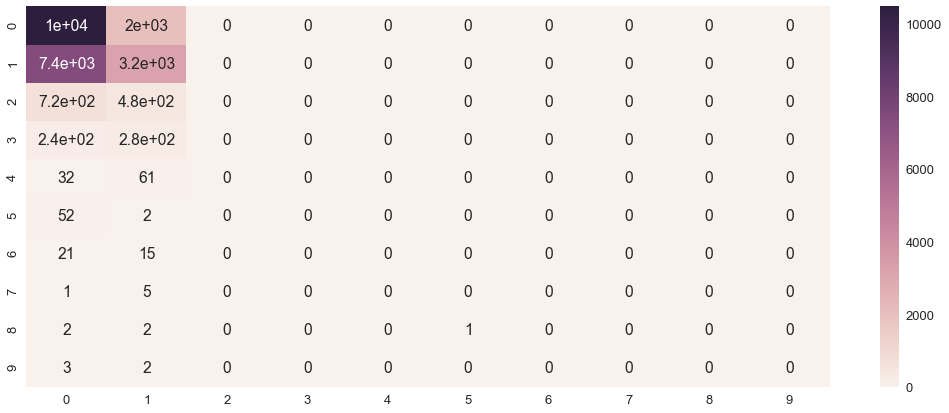

In [14]:
print ("Training set classification confusion matrix:\n")
print (train_cnf, "\n")

# Better visualization of training data confusion matrix using seaborn's heatmap function
plt.figure(figsize = (18,7))
seaborn.set(font_scale=1.3)
cnf1 = seaborn.heatmap(train_cnf, annot=True)

In [15]:
print ("Training set classification report:\n")
print (train_classreport)
print ("Training set accuracy:", train_acc)

Training set classification report:

             precision    recall  f1-score   support

          0       0.55      0.84      0.67     12493
          1       0.53      0.30      0.39     10599
          2       0.00      0.00      0.00      1206
          3       0.00      0.00      0.00       513
          4       0.00      0.00      0.00        93
          5       0.00      0.00      0.00        54
          6       0.00      0.00      0.00        36
          7       0.00      0.00      0.00         6
          8       0.00      0.00      0.00         5
          9       0.00      0.00      0.00         5

avg / total       0.50      0.55      0.50     25010

Training set accuracy: 0.547620951619


### Shown below are the confusion matrix, classification report, and accuracy score for the TEST data set.

Test set classification confusion matrix:

[[420286  80923      0      0      0      0      0      0      0      0]
 [296944 125554      0      0      0      0      0      0      0      0]
 [ 29325  18296      1      0      0      0      0      0      0      0]
 [ 10743  10376      2      0      0      0      0      0      0      0]
 [  1453   2432      0      0      0      0      0      0      0      0]
 [  1795    174      0      0      0     27      0      0      0      0]
 [   673    746      5      0      0      0      0      0      0      0]
 [    77    149      4      0      0      0      0      0      0      0]
 [     8      4      0      0      0      0      0      0      0      0]
 [     2      1      0      0      0      0      0      0      0      0]] 



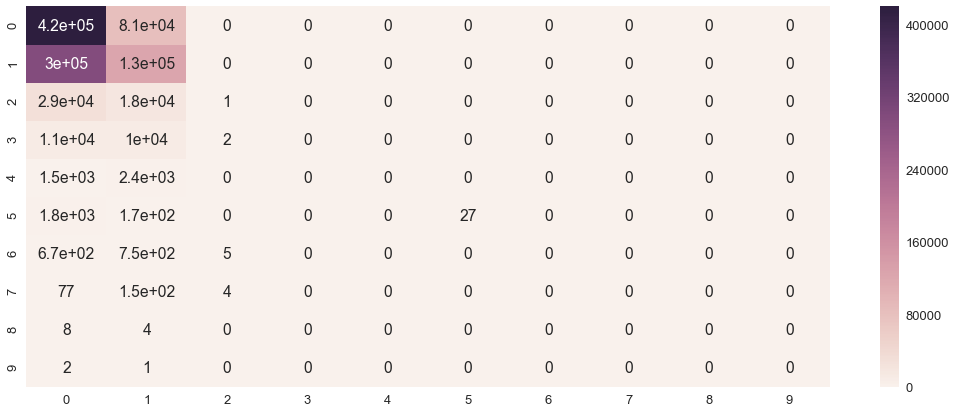

In [16]:
print ("Test set classification confusion matrix:\n")
print (test_cnf, "\n")

# Better visualization of test data confusion matrix using seaborn's heatmap function
plt.figure(figsize = (18,7))
seaborn.set(font_scale=1.3)
cnf2 = seaborn.heatmap(test_cnf, annot=True)

In [17]:
print ("Test set classification report:\n")
print (test_classreport)
print ("Test set accuracy:", test_acc)

Test set classification report:

             precision    recall  f1-score   support

          0       0.55      0.84      0.67    501209
          1       0.53      0.30      0.38    422498
          2       0.08      0.00      0.00     47622
          3       0.00      0.00      0.00     21121
          4       0.00      0.00      0.00      3885
          5       1.00      0.01      0.03      1996
          6       0.00      0.00      0.00      1424
          7       0.00      0.00      0.00       230
          8       0.00      0.00      0.00        12
          9       0.00      0.00      0.00         3

avg / total       0.50      0.55      0.49   1000000

Test set accuracy: 0.545868


### The training set accuracy score is 0.5475 (54.75%), whilst the test set accuracy score is 0.5443 (54.43%).
### Accuracy score percent variance is 0.0031439996, or around 0.314%.
### The low prediction accuracies for both datasets and the minimal variance suggests that the model is underfitted.
### Another performance measure is the F<sub>1</sub> score, which is the "harmonic average of the precision and recall." Note that both F<sub>1</sub> scores with respect to classifying samples from the training and test datasets are 0.48, suggesting that the multilayer perceptron ANN model performed equally for both datasets.

------
## So why are the scores low?

### See the following plots for the number of instances for each classification in the training and test data sets.

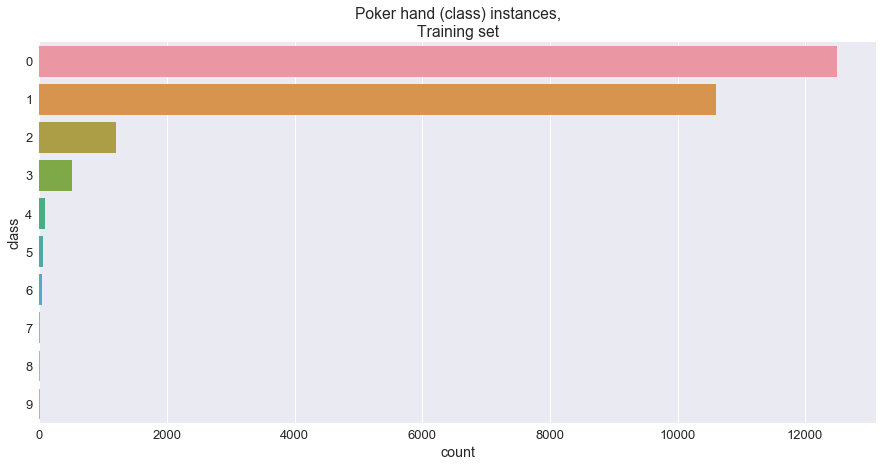

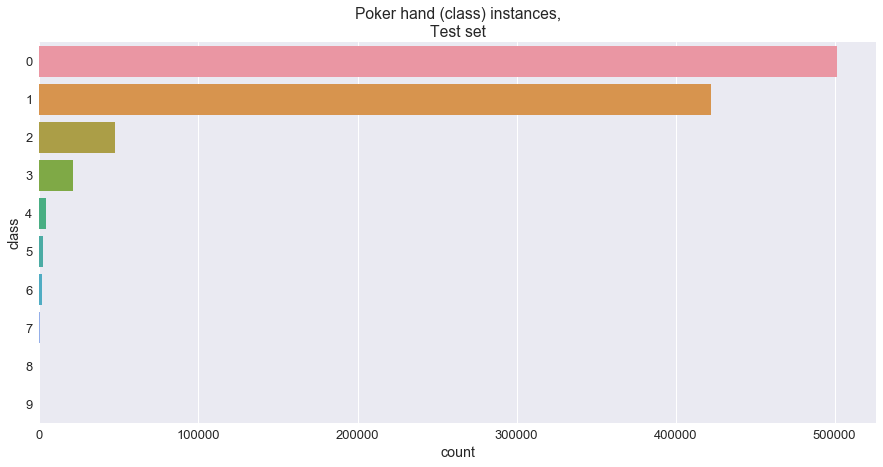

In [18]:
# Bar count plot showing number of instances per class for the training set
dimensions = (15, 7) # setting the figure size
fig, ax = plt.subplots(figsize=dimensions) # applying the figure size to the graph
plt.title("Poker hand (class) instances,\nTraining set") # titling the graph
count1 = seaborn.countplot(y="class", data=train_set, ax=ax) # the graph itself

# Bar count plot showing number of instances per class for the test set
dimensions = (15, 7) # setting the figure size
fig, ax = plt.subplots(figsize=dimensions) # applying the figure size to the graph
plt.title("Poker hand (class) instances,\nTest set") # titling the graph
count2 = seaborn.countplot(y="class",data=test_set, ax=ax) # the graph itself

### [Explain skewed data]

### Shown below is a performance comparison of machine learning techniques by Jagdeep S. Sihota, taken from his study [Poker Rule Induction](http://rstudio-pubs-static.s3.amazonaws.com/59520_f25e40618a3a442ca45b110b57a24a6f.html "Poker Hand Induction").

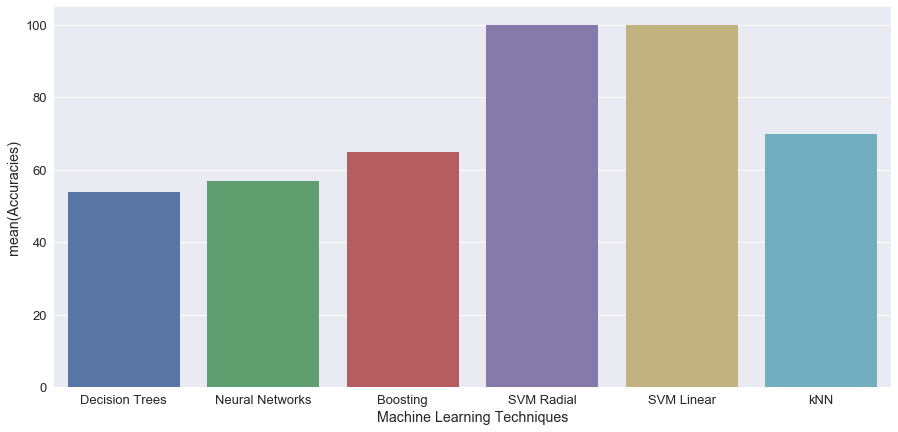

In [19]:
# Creating a dataframe for purposes of the comparison
mltech = ["Decision Trees", "Neural Networks", "Boosting", "SVM Radial", "SVM Linear", "kNN"]
acc = [54, 57, 65, 100, 100, 70]
mltech_acc = pandas.DataFrame({'Machine Learning Techniques': mltech, 'Accuracies': acc})

# Bar plot showing the performance comparison of machine learning techniques in classifying poker hand instances
dimensions = (15, 7)
fig, ax = plt.subplots(figsize=dimensions)
plt.xlabel("Machine Learning Techniques")
bar1 = seaborn.barplot(x='Machine Learning Techniques',y='Accuracies',data=mltech_acc)

### Because of the nature of the data -- that is, biased towards few out of the 10 classifications -- reasonable changes in the structure of the multi-layer perceptron and parameters in training it would still result in performance measures that linger at around 50%.

### [Details on Support Vector Machine as a better option, as a better solution to this classification problem]